# Project: Credit scoring model using classification algorithms

In [350]:
#Step 1: Import Libraries

In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import joblib

In [352]:
# Step 2: Upload data

In [373]:
# Make sure the file is in the same path
file_path = "cs-training.csv"   

df = pd.read_csv(file_path, index_col=0)

In [354]:
# Display preliminary information

In [355]:
print("\nData Information:")
print(df.info())
print("\nFirst 5 Rows of Data:")
print(df.head())


Data Information:
<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null 

In [356]:
#Step 3: Process missing values

In [357]:
print("\nNumber of missing values:")
print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)


Number of missing values:
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


In [358]:
#Step 4: Separate features from the target

In [359]:
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

In [360]:
# Step 5: Partition the data

In [361]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [362]:
#Step 6: Standardize data

In [363]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [364]:
#Step 7: Train the logistic regression model

In [365]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [366]:
#Step 8: Evaluate the logistic regression model

In [367]:
y_pred_lr = lr_model.predict(X_test_scaled)
y_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print("\nLogistic regression evaluation:")
print(classification_report(y_test, y_pred_lr))
print("="*50)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("="*50)
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_lr))


Logistic regression evaluation:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28044
           1       0.52      0.04      0.07      1956

    accuracy                           0.94     30000
   macro avg       0.73      0.52      0.52     30000
weighted avg       0.91      0.94      0.91     30000

Confusion Matrix:
[[27974    70]
 [ 1880    76]]
ROC AUC Score: 0.6926867077706402


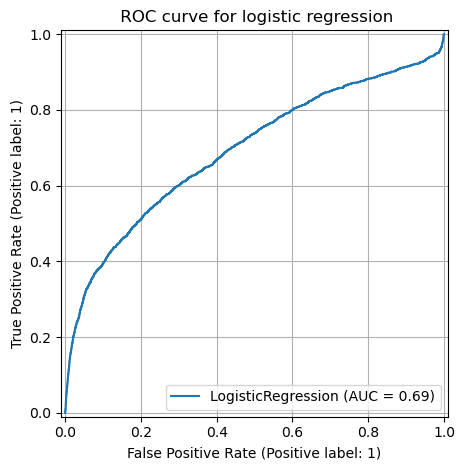

In [368]:
RocCurveDisplay.from_estimator(lr_model, X_test_scaled, y_test)
plt.title(' ROC curve for logistic regression')
plt.grid(True)
plt.tight_layout()
plt.show()

In [369]:
# Step 9: Analyze the importance of features

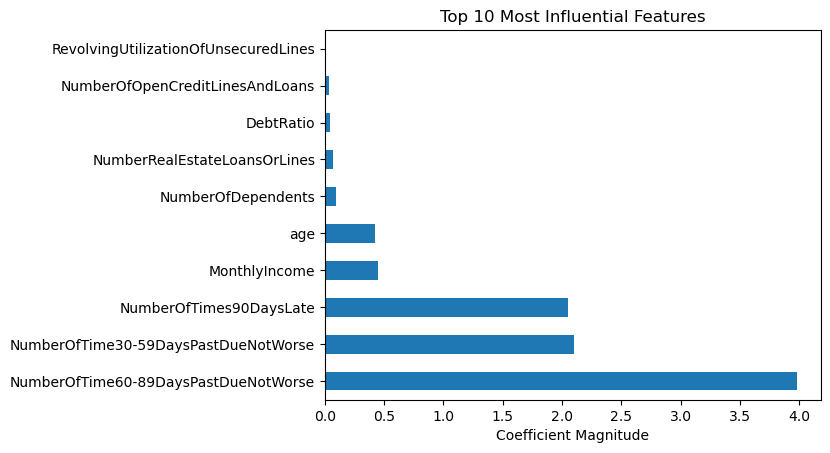

In [370]:
importances = pd.Series(np.abs(lr_model.coef_[0]), index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Most Influential Features')
plt.xlabel('Coefficient Magnitude')
plt.show()

In [371]:
#Step 10: Save the model and scale.

In [372]:
joblib.dump(lr_model, 'credit_scoring_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("\nThe model and scale have been saved successfully.")


The model and scale have been saved successfully.
